<a href="https://colab.research.google.com/github/Evans-tats/machine-learning/blob/main/Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
from google.colab import files  # skip this if not using Google Colab
files.upload()  # Upload kaggle.json manually


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"evanskipsang","key":"ff66d8f0e99e93411cd7356a4a979f33"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d d4rklucif3r/cat-and-dogs


Dataset URL: https://www.kaggle.com/datasets/d4rklucif3r/cat-and-dogs
License(s): DbCL-1.0
 78% 170M/218M [00:00<00:00, 485MB/s]
100% 218M/218M [00:00<00:00, 428MB/s]


In [ ]:
!unzip *.zip


In [6]:
import tensorflow as tf
# Import layers directly from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten #Corrected import statement
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

In [8]:
training_path = '/content/dataset/training_set'
train_set = train_data.flow_from_directory(directory=training_path,
                                           target_size=(128,128),
                                           batch_size=32,
                                           color_mode='rgb',
                                           class_mode='binary')


Found 8000 images belonging to 2 classes.


In [10]:
test_path = '/content/dataset/test_set'
validation_set = test_data.flow_from_directory(
    directory=test_path,
    target_size=(128,128),batch_size=30, shuffle=True,
    class_mode='binary',
    color_mode='rgb'
)

Found 2000 images belonging to 2 classes.


In [11]:
cnn = Sequential()

#firstlayer
cnn.add(Conv2D(32,(3,3), input_shape=(128,128,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
#secondlayer
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
#fatternlayer
cnn.add(Flatten())
#dense layer
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,765,505 (56.33 MB)

 Trainable params: 14,765,505 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
model_history = cnn.fit(train_set, epochs=10, validation_data=validation_set)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.5967 - loss: 0.6690 - val_accuracy: 0.6325 - val_loss: 0.6705
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 249s 995ms/step - accuracy: 0.7081 - loss: 0.5729 - val_accuracy: 0.7050 - val_loss: 0.5761
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 247s 987ms/step - accuracy: 0.8012 - loss: 0.4405 - val_accuracy: 0.7205 - val_loss: 0.5744
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 247s 987ms/step - accuracy: 0.8833 - loss: 0.2711 - val_accuracy: 0.7015 - val_loss: 0.7422
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 248s 992ms/step - accuracy: 0.9541 - loss: 0.1250 - val_accuracy: 0.7110 - val_loss: 0.9521
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.9834 - loss: 0.0570 - val_accuracy: 0.7040 - val_loss: 1.3355
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.9933 - loss: 0.0261 - val_accuracy: 0.6955 - val_loss: 1.2299
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 248s 994ms/step - accuracy: 0.9964 - loss: 0.

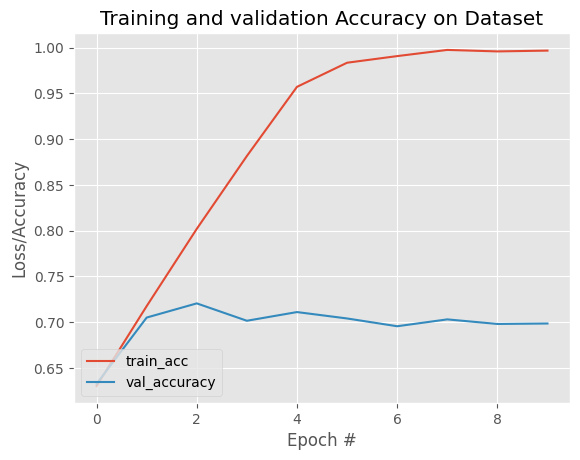

In [16]:
import matplotlib.pyplot as plt
import numpy as np
N = 10
plt.style.use("ggplot")
plt.figure()
H=model_history

plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy")

plt.title("Training and validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

TRANSFER LEARNING USING INCEPTION RESNETV2

In [17]:
#Data Augementation - prevents overfitting

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=0.45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True
)
# // what rescale=1./255 does
def preprocess_image(image):
  return image.astype('float32')/255.0

train_generator = datagen.flow_from_directory(
    directory=training_path,
    target_size=(224,224),
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
)
validation_generator = datagen.flow_from_directory(
    directory=test_path,
    target_size=(224,224),
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
# // Add transfer learning

base_model = InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    input_tensor=None,
    pooling="max",
    classes=1000,
    classifier_activation='softmax',
    name='inception_resnet_v2'
    )
base_model.trainable=False

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [25]:
from tensorflow.keras.optimizers import Adamax

model2 = Sequential([
    base_model,
    # Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(521, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer=Adamax(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_resnet_v2             │ (None, 1536)           │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 521)            │       800,777 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       133,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,314,410 (211.01 MB)

 Trainable params: 977,674 (3.73 MB)

 Non-trainable params: 54,336,736 (207.28 MB)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=4,          # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best model weights
)

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',  # Use .keras extension
    monitor='val_accuracy',       # Metric to monitor
    save_best_only=True,          # Save only the best model
    mode='max'                    # Maximize the monitored metric
)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.1,          # Reduce learning rate by a factor of 0.1
    patience=3           # Number of epochs to wait before reducing LR
)

In [32]:
history = model2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=3,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]  # Add callbacks here
)

Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 2492s 10s/step - accuracy: 0.9011 - loss: 0.2930 - val_accuracy: 0.9215 - val_loss: 0.2012 - learning_rate: 1.0000e-04
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 2450s 10s/step - accuracy: 0.9182 - loss: 0.1990 - val_accuracy: 0.9175 - val_loss: 0.1905 - learning_rate: 1.0000e-04
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 2453s 10s/step - accuracy: 0.9259 - loss: 0.1854 - val_accuracy: 0.9330 - val_loss: 0.1772 - learning_rate: 1.0000e-04


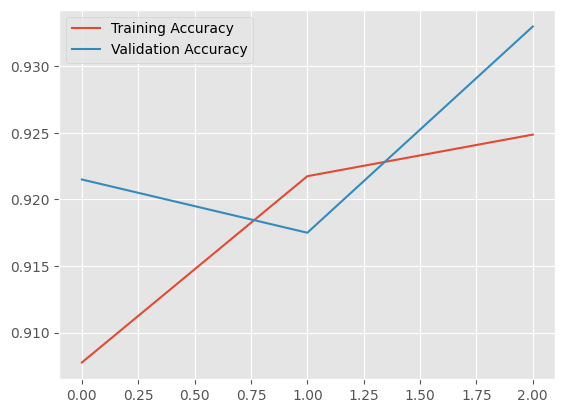

Model training completed!


In [33]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

print("Model training completed!")

In [49]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/dataset/single_prediction/cat_or_dog_1.jpg', target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0   # Normalize pixel values
test_image = np.expand_dims(test_image, axis=0)

result = model2.predict(test_image)

if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

print(f"Raw prediction: {result[0][0]}")
print(f"Predicted class: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
Raw prediction: 0.9955314993858337
Predicted class: dog
